# Figure 5: Denmark Strait freshwater transport adjoint sensitivities

This notebook will reproduce Figure 5 from  E. Boland et al. 2025 (doi to come). This requires input datafiles (expects to find them in ../data_out) to run - please see the README for details.

Please attribute any plots or code from this notebook using the DOI from Zenodo: TO COME

E Boland Jan 2025 [emmomp@bas.ac.uk](email:emmomp@bas.ac.uk)

In [9]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import sys
sys.path.insert(0,'/users/emmomp/Python/ECCOv4-py')
import ecco_v4_py as ecco
sys.path.insert(0,'/users/emmomp/Python')
import xadjoint as xad
import utils as ut
import calendar
from inputs import *

In [10]:
mths=['Mar','Jun','Sep','Dec']
mths_synth=['Jan','Feb','Apr','May','Jul','Aug','Oct','Nov']
adj_freq=604800
nt=260
adj_vars=['adxx_qnet','adxx_empmr','adxx_tauu','adxx_tauv']

lags=[0,-0.25,-0.5,-1.5,-4]
lag_labels=['0 to -3m lag','-3 to -6m lag','-6 to -18m lag','-18m to -4y lag','0 to -4y lag']

In [11]:
ds_climanom=xr.open_dataset(f'{EXPDIR}/fwd_26y/exf_climanoms.nc')
ds_climanom

<xarray.Dataset> Size: 7GB
Dimensions:   (time: 1357, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_u: 50,
               k_l: 50, k_p1: 51, tile: 13)
Coordinates: (12/18)
    iter      (time) int64 11kB ...
  * i         (i) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g       (i_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j         (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g       (j_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k         (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
    ...        ...
    YC        (tile, j, i) float32 421kB ...
    CS        (tile, j, i) float32 421kB ...
    SN        (tile, j, i) float32 421kB ...
    rA        (tile, j, i) float32 421kB ...
    Depth     (tile, j, i) float32 421kB ...
    month     (time) int64 11kB ...
Data variables:
    EXFqnet   (time, tile, j, i) float32 572MB ...
    EXFempmr  (time, tile, j, i) float32 572MB ...
    EXFtaux   (time, tile, j, i_g) float32 572MB ...
    EXFtauy   (time, tile, j_g, i) float32 572MB ...
    oceTAUX   (time, tile, j, i_g) float32 572MB ...
    oceTAUY   (time, tile, j_g, i) float32 572MB ...
    oceFWflx  (time, tile, j, i) float32 572MB ...
    oceQnet   (time, tile, j, i) float32 572MB ...
    EXFtauu   (time, tile, j, i) float32 572MB ...
    EXFtauv   (time, tile, j, i) float32 572MB ...
    oceTAUU   (time, tile, j, i) float32 572MB ...
    oceTAUV   (time, tile, j, i) float32 572MB ...

In [13]:
ds_ca_seasvar=ds_climanom.groupby(ds_climanom.time.dt.season).var('time')
ds_ca_seasvar

<xarray.Dataset> Size: 23MB
Dimensions:   (season: 4, tile: 13, j: 90, i: 90, i_g: 90, j_g: 90, k: 50,
               k_u: 50, k_l: 50, k_p1: 51)
Coordinates: (12/16)
  * i         (i) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * i_g       (i_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * j         (j) int64 720B 0 1 2 3 4 5 6 7 8 9 ... 81 82 83 84 85 86 87 88 89
  * j_g       (j_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * k         (k) int64 400B 0 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48 49
  * k_u       (k_u) int64 400B 0 1 2 3 4 5 6 7 8 ... 41 42 43 44 45 46 47 48 49
    ...        ...
    YC        (tile, j, i) float32 421kB -88.24 -88.38 -88.52 ... -88.08 -88.1
    CS        (tile, j, i) float32 421kB 0.06158 0.06675 ... -0.9854 -0.9984
    SN        (tile, j, i) float32 421kB -0.9981 -0.9978 ... -0.1705 -0.05718
    rA        (tile, j, i) float32 421kB 3.623e+08 3.633e+08 ... 3.611e+08
    Depth     (tile, j, i) float32 421kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * season    (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    EXFqnet   (season, tile, j, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EXFempmr  (season, tile, j, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EXFtaux   (season, tile, j, i_g) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EXFtauy   (season, tile, j_g, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    oceTAUX   (season, tile, j, i_g) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    oceTAUY   (season, tile, j_g, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    oceFWflx  (season, tile, j, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    oceQnet   (season, tile, j, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EXFtauu   (season, tile, j, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    EXFtauv   (season, tile, j, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    oceTAUU   (season, tile, j, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    oceTAUV   (season, tile, j, i) float32 2MB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

In [8]:
NA=(ds_climanom.XC>-60)&(ds_climanom.XC<0)&(ds_climanom.YC>50)
ds_ca_monvar=ds_climanom.groupby(ds_climanom.time.dt.month).var('time')
ds_NA=ds_ca_monvar.where(NA).weighted(ds_ca_monvar.rA).mean(['tile','j','i'])

Text(0, 0.5, 'Regional Mean Variance')

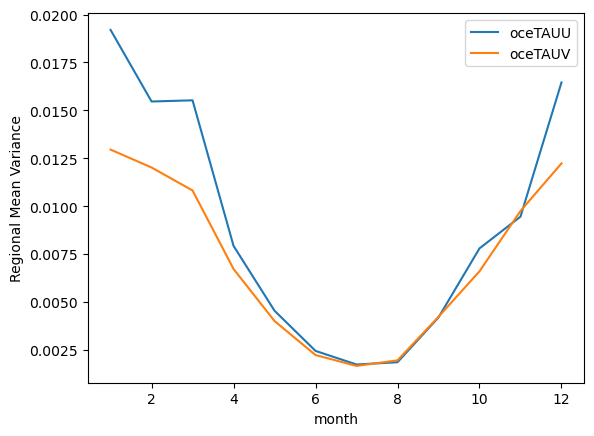

In [9]:
ds_NA['oceTAUU'].plot(x='month')
ds_NA['oceTAUV'].plot(x='month')
plt.legend(['oceTAUU','oceTAUV'])
plt.ylabel('Regional Mean Variance')

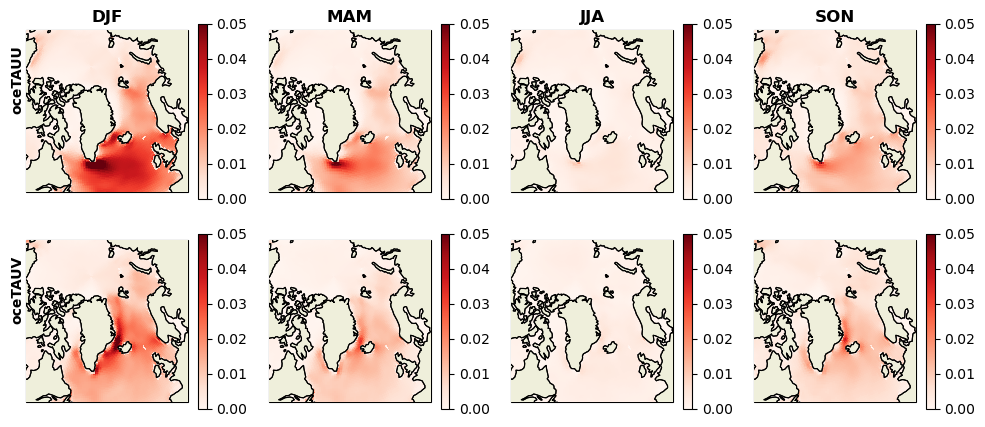

In [14]:
xmin,xmax,ymin,ymax=(-2266791.253073855,
 3358349.2597455736,
 -2166791.253073855,
 3458349.2597455736)
proj_dict={'projection_type':'ortho','user_lon_0':-45,'user_lat_0':70}
my_projn = ccrs.Orthographic(central_longitude=-45,central_latitude=70)

q_labels=['JFM','AMJ','JAS','OND']
plt.figure(figsize=[12,5])
pp=1
for var in ['oceTAUU','oceTAUV']:
    for seas in ['DJF','MAM','JJA','SON']:
        [f,ax,p]=ut.plot_ecco(ecco_grid,ds_ca_seasvar[var].sel(season=seas),subplot_grid=[2,4,pp],
                       **proj_dict,rasterized=True,
                       cmin=0,cmax=0.05,
                              cmap='Reds'
                      )   
        if var=='oceTAUU':
            ax.set_title(seas,fontweight='bold')
        if seas=='DJF':
            ax.text(-0.1,0.5,var,fontweight='bold',transform=ax.transAxes,rotation=90)
        ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
        pp+=1

In [15]:
ds_all={}
for mth in mths:
    ds_all[mth]={}
    for year in eyears:
        expt=f'ad_5y_denstr_horflux_fw_{mth}_noparam_7d_{year}/'
        startdate=f'{int(year)-4}-01-01'
        lag0=f'{year}-{mthi[mth]:02.0f}-{calendar.monthrange(int(year),mthi[mth])[1]}'
        print(expt,startdate,lag0)
        myexp = xad.Experiment(GRIDDIR,f'{EXPDIR}/{expt}',start_date=startdate,lag0=lag0,nt=nt,adj_freq=adj_freq)
        myexp.load_vars(['adxx_qnet','adxx_tauu','adxx_tauv','adxx_empmr'])
    
        myexp.data['adxx_tauu']=-myexp.data['adxx_tauu'].rename({'i_g':'i'})
        myexp.data['adxx_tauv']=-myexp.data['adxx_tauv'].rename({'j_g':'j'})
    
        myexp.data=myexp.data.assign_coords({'eyear':year,'month':mth,'fc':myexp.fc}).swap_dims({'time':'lag_years'})
        ds_all[mth][year]=myexp.data
#ds_all

ad_5y_denstr_horflux_fw_Mar_noparam_7d_2006/ 2002-01-01 2006-03-31
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_horflux_fw_Mar_noparam_7d_2014/ 2010-01-01 2014-03-31
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_horflux_fw_Mar_noparam_7d_2000/ 1996-01-01 2000-03-31
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_horflux_fw_Jun_noparam_7d_2006/ 2002-01-01 2006-06-30
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_horflux_fw_Jun_noparam_7d_2014/ 2010-01-01 2014-06-30
Found 6 ADJ variables
Found 7 adxx variables
Reading in adxx_qnet
Reading in adxx_tauu
Reading in adxx_tauv
Reading in adxx_empmr
ad_5y_denstr_ho

In [16]:
ds_plot_all=[]
for iv,var in enumerate(adj_vars):
    ds_plot_exp=[]
    for mth in mths:
        ds_plot_mth=[]
        for year in eyears:
            ds_plot_year=[]
            for ilag in range(0,len(lags)-1):
                ds_plot=ds_all[mth][year][var].sel(lag_years=slice(lags[ilag+1],lags[ilag])).mean('lag_years').squeeze()
                ds_plot['lag_range']=lag_labels[ilag]
                ds_plot_year.append(ds_plot)
            ilag+=1
            ds_plot=ds_all[mth][year][var].sel(lag_years=slice(lags[-1],0)).mean('lag_years').squeeze()
            ds_plot['lag_range']=lag_labels[-1]
            ds_plot_year.append(ds_plot)
            ds_plot_mth.append(xr.concat(ds_plot_year,'lag_range'))
        ds_plot_exp.append(xr.concat(ds_plot_mth,'eyear'))
    ds_plot_exp=xr.concat(ds_plot_exp,'month')
    ds_plot_exp.name=var
    ds_plot_all.append(ds_plot_exp)
ds_plot_all=xr.merge(ds_plot_all).load()
ds_plot_all

<xarray.Dataset> Size: 101MB
Dimensions:     (tile: 13, j: 90, i: 90, eyear: 3, month: 4, lag_range: 5)
Coordinates:
  * tile        (tile) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j           (j) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * i           (i) int64 720B 0 1 2 3 4 5 6 7 8 ... 81 82 83 84 85 86 87 88 89
  * eyear       (eyear) <U4 48B '2006' '2014' '2000'
  * month       (month) <U3 48B 'Mar' 'Jun' 'Sep' 'Dec'
    fc          (month, eyear) float64 96B -8.207e+04 -6.799e+04 ... -8.126e+04
  * lag_range   (lag_range) <U15 300B '0 to -3m lag' ... '0 to -4y lag'
Data variables:
    adxx_qnet   (month, eyear, lag_range, tile, j, i) float32 25MB 0.0 ... 0.0
    adxx_empmr  (month, eyear, lag_range, tile, j, i) float32 25MB 0.0 ... 0.0
    adxx_tauu   (month, eyear, lag_range, tile, j, i) float32 25MB 0.0 ... 0.0
    adxx_tauv   (month, eyear, lag_range, tile, j, i) float32 25MB 0.0 ... 0.0

In [27]:
#xmin,xmax,ymin,ymax=(-2266791.253073855,
# 3358349.2597455736,
# -2166791.253073855,
# 3458349.2597455736)
xmin,xmax,ymin,ymax=(-3266791.253073855,
 3358349.2597455736,
 -3566791.253073855,
 3458349.2597455736)
proj_dict={'projection_type':'ortho','user_lon_0':-45,'user_lat_0':70}
my_projn = ccrs.Orthographic(central_longitude=-45,central_latitude=70)
[section_pt1,section_pt2]=ecco.get_section_endpoints('Denmark Strait')
exf_units=dict(zip(adj_vars,['W/m$^2$','m/s','m$^2$/s','m$^2$/s']))
exf_labels=dict(zip(adj_vars,['Net Heat Flux','Net Freshwater Flux','Zonal Wind Stress','Meridional Wind Stress']))
clims=dict(zip(adj_vars,[[0.005,6e-4,3e-4,1e-5],[10e3,600,250,75],[5,3,1,0.3],[5,3,1,0.3]]))
var_clims=dict(zip(adj_vars,[15e3,2e-14,0.03,0.03]))

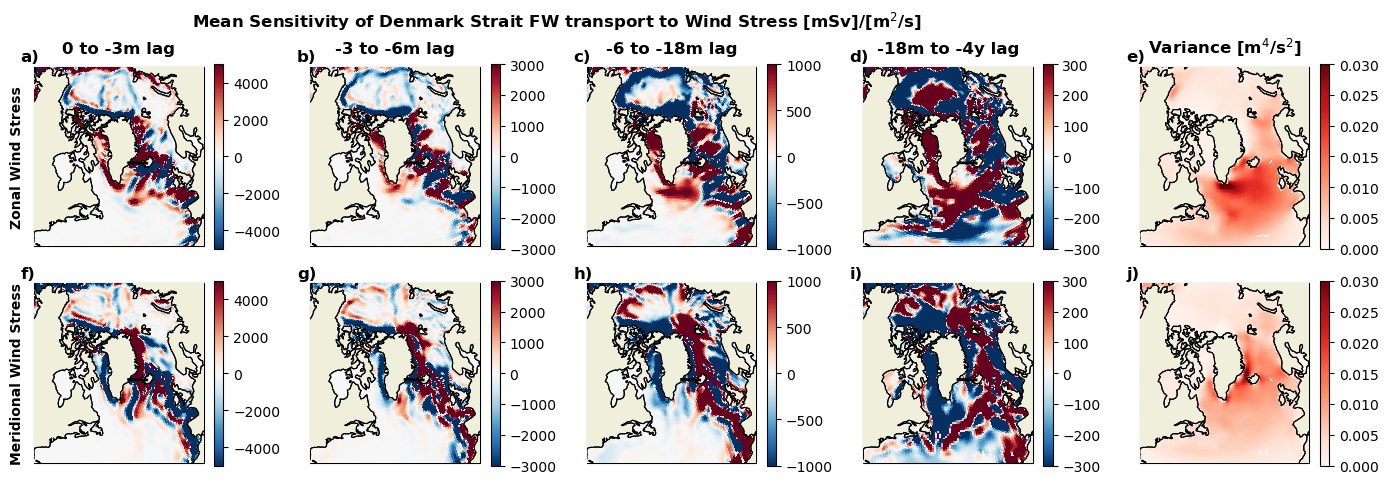

In [28]:
fig=plt.figure(figsize=[14,5])
pp=1
for iv,var in enumerate(adj_vars[2:]): 
    mth_mean=1e3*ds_plot_all[var].mean(['eyear','month'])
    var_var=ds_climanom[adj_diag_map[var][0]].sel(time=slice('1996-01-01',None)).var('time')
    for ilag in range(0,len(lags)-1):
        [f,ax,p]=ut.plot_ecco(ecco_grid,mth_mean.isel(lag_range=ilag),subplot_grid=[2,5,pp],
                           **proj_dict,rasterized=True,
                           cmin=-clims[var][ilag]*1e3,cmax=clims[var][ilag]*1e3
                          )
        ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
        ax.plot([section_pt1[0],section_pt2[0]],[section_pt1[1],section_pt2[1]],
             color='k', linewidth=2,transform=ccrs.PlateCarree(),zorder=1000)
        plt.text(-0.08,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        if pp<6:
            plt.title(lag_labels[ilag],fontsize=12,fontweight='bold',y=1.03)
        if ilag==0:
            ax.text(-0.1,0.5,f'{exf_labels[var]}',transform=ax.transAxes,rotation='vertical',ha='center',va='center',fontweight='bold')
        pp+=1
    [f,ax,p]=ut.plot_ecco(ecco_grid,var_var,subplot_grid=[2,5,pp],
                       **proj_dict,rasterized=True,
                       cmin=0,cmax=var_clims[var],cmap='Reds'
                      )    
    ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
    plt.text(-0.08,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
    if pp<6:
        plt.title('Variance [m$^4$/s$^2$]',fontsize=12,fontweight='bold',y=1.03)
    pp+=1
    
plt.suptitle('Mean Sensitivity of Denmark Strait FW transport to Wind Stress [mSv]/[m$^2$/s]',fontsize=12,fontweight='bold',y=0.96,x=0.4)
plt.tight_layout()
plt.savefig('../plots/fig5_meanwindstressadxx_vslag.pdf')

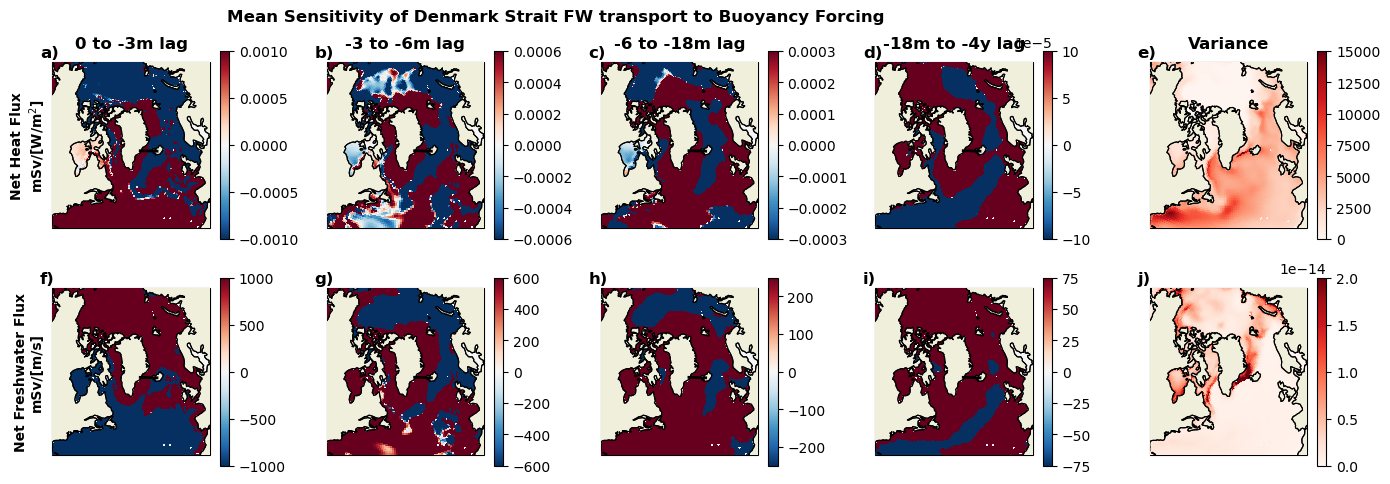

In [22]:
fig=plt.figure(figsize=[14,5])
pp=1
for iv,var in enumerate(adj_vars[:2]): 
    mth_mean=1e3*ds_plot_all[var].mean(['eyear','month'])
    var_var=ds_climanom[adj_diag_map[var][0]].sel(time=slice('1996-01-01',None)).var('time')
    for ilag in range(0,len(lags)-1):
        [f,ax,p]=ut.plot_ecco(ecco_grid,mth_mean.isel(lag_range=ilag),subplot_grid=[2,5,pp],
                           **proj_dict,rasterized=True,
                           cmin=-clims[var][ilag]*1e3,cmax=clims[var][ilag]*1e3
                          )
        ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
        ax.plot([section_pt1[0],section_pt2[0]],[section_pt1[1],section_pt2[1]],
             color='k', linewidth=2,transform=ccrs.PlateCarree(),zorder=1000)
        plt.text(-0.08,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
        if pp<6:
            plt.title(lag_labels[ilag],fontsize=12,fontweight='bold',y=1.03)
        if ilag==0:
            ax.text(-0.15,0.5,f'{exf_labels[var]}\nmSv/[{exf_units[var]}]',transform=ax.transAxes,rotation='vertical',ha='center',va='center',fontweight='bold')
        pp+=1
    [f,ax,p]=ut.plot_ecco(ecco_grid,var_var,subplot_grid=[2,5,pp],
                       **proj_dict,rasterized=True,
                       cmin=0,cmax=var_clims[var],cmap='Reds'
                      )    
    ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
    plt.text(-0.08,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
    if pp<6:
        plt.title('Variance',fontsize=12,fontweight='bold',y=1.03)
    pp+=1
    
plt.suptitle(f'Mean Sensitivity of Denmark Strait FW transport to Buoyancy Forcing',fontsize=12,fontweight='bold',x=0.4,y=0.96)
plt.tight_layout()
plt.savefig('../plots/fig5_meanbuoyancyadxx_vslag.pdf')

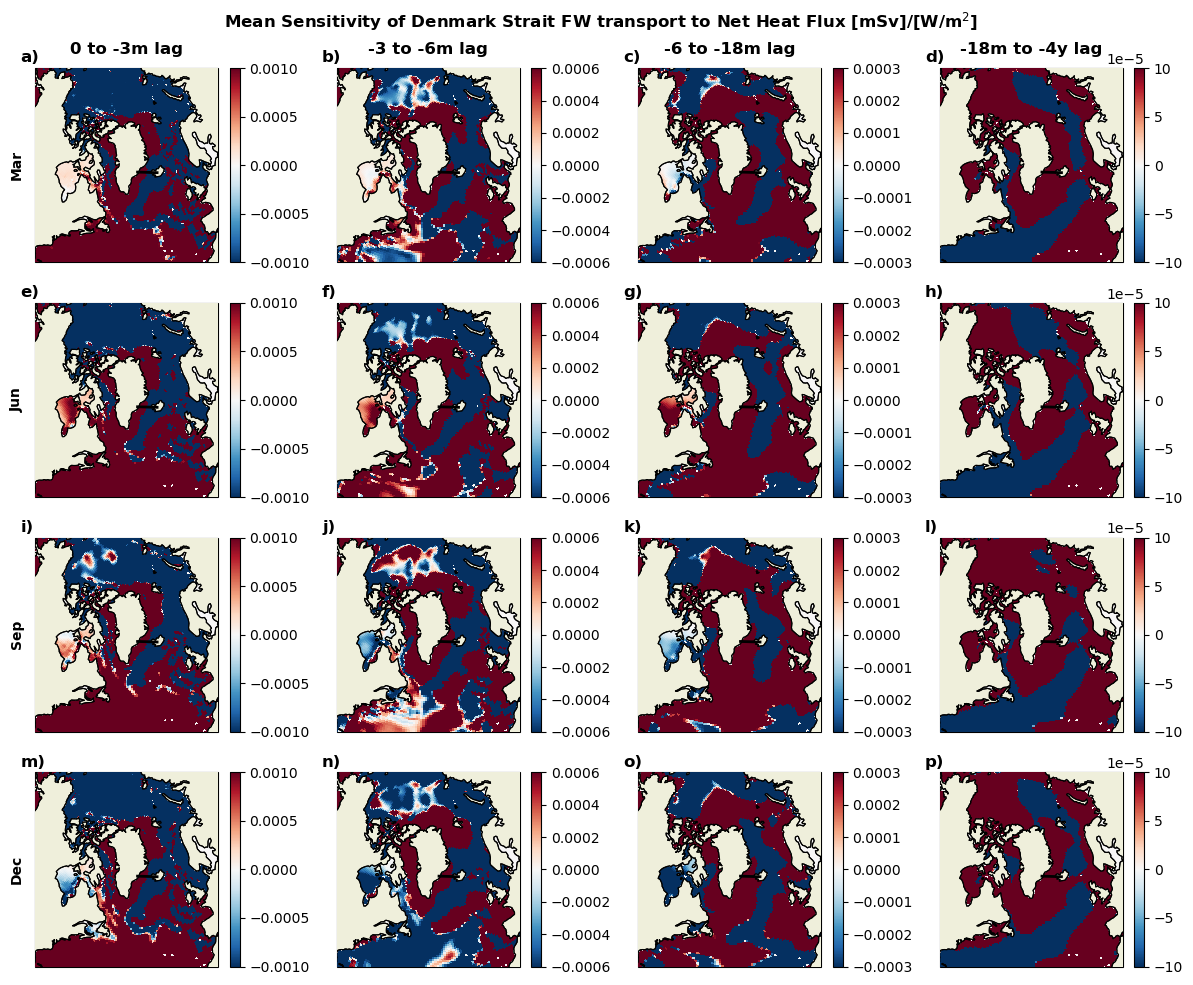

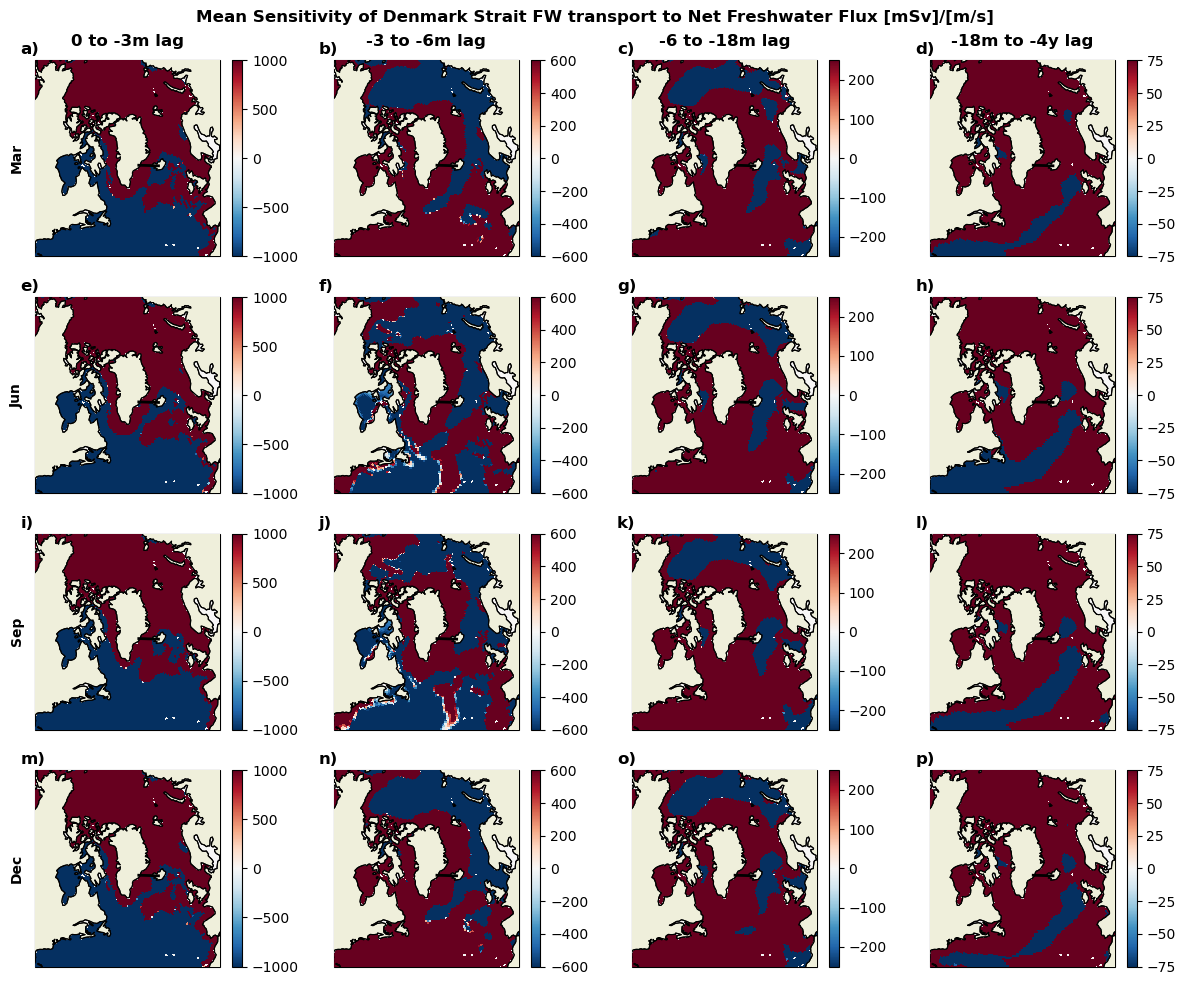

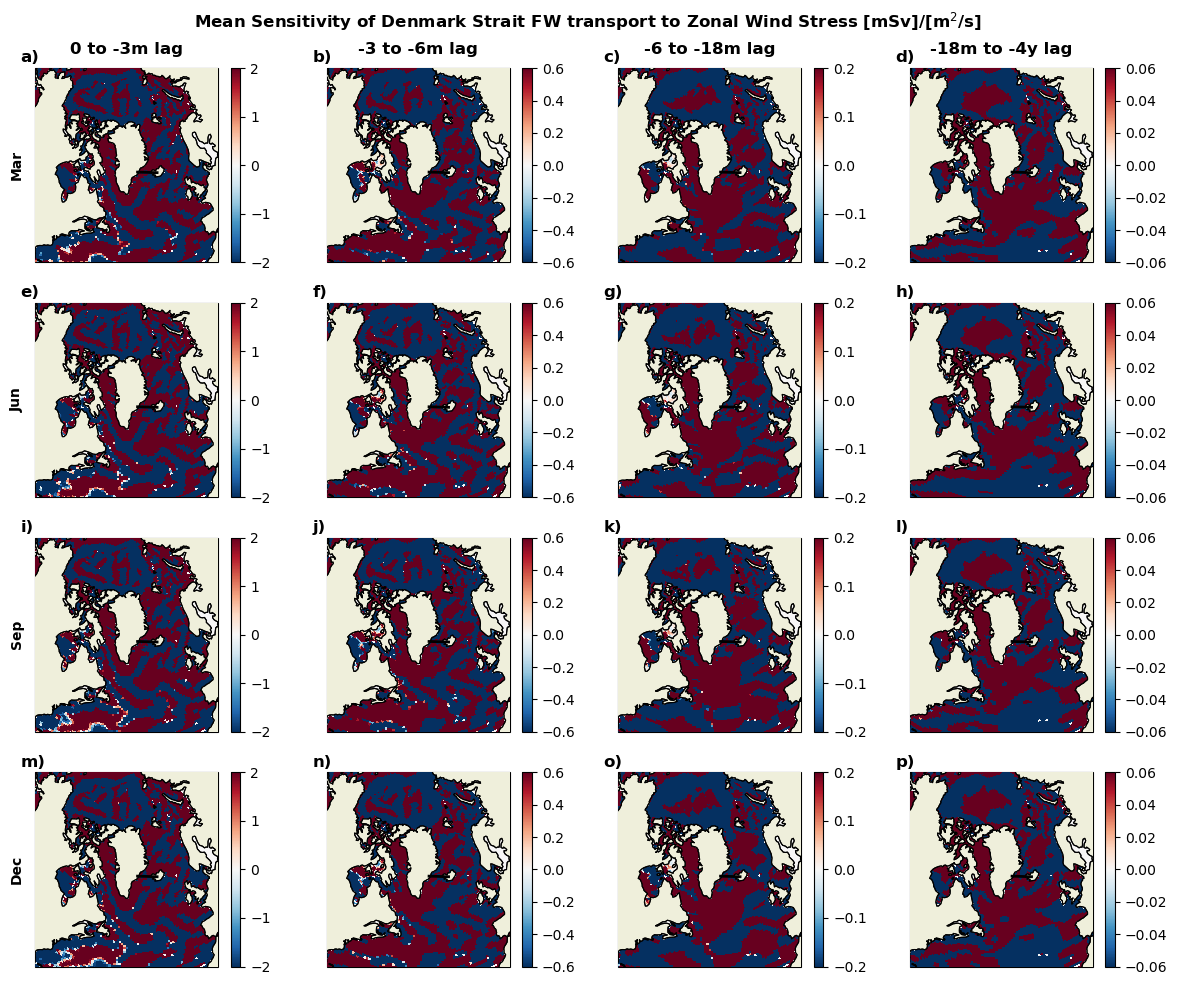

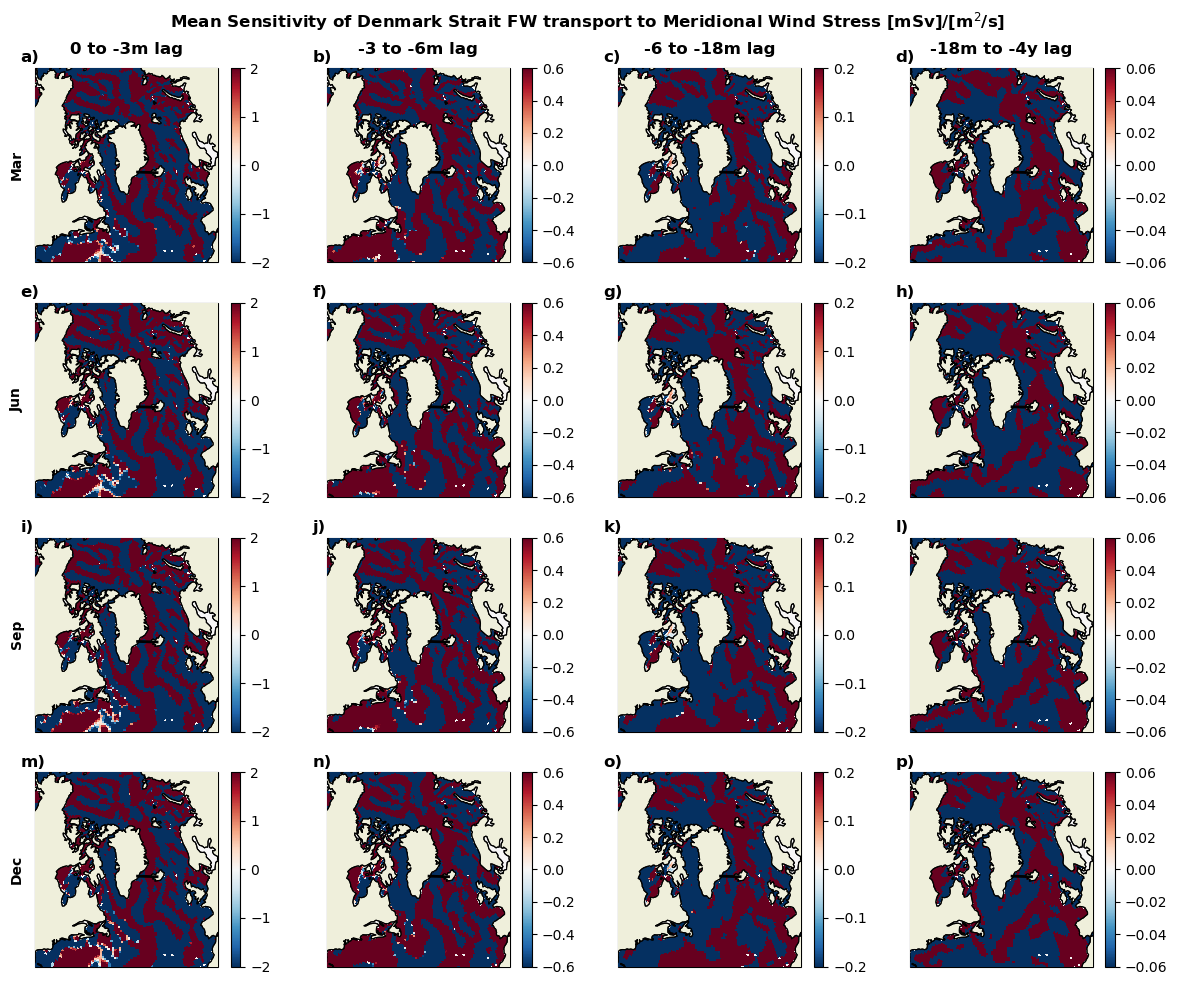

In [23]:
mth_i=[3,6,9,12]
for iv,var in enumerate(adj_vars): 
    fig=plt.figure(figsize=[12,10])
    pp=1
    mth_plot=1e3*ds_plot_all[var].mean('eyear')
    for month in mth_i:
        for ilag in range(0,len(lags)-1):
            [f,ax,p]=ut.plot_ecco(ecco_grid,mth_plot.isel(lag_range=ilag).sel(month=imth[month]),subplot_grid=[4,4,pp],
                               **proj_dict,rasterized=True,
                               cmin=-clims[var][ilag]*1e3,cmax=clims[var][ilag]*1e3
                              )
            ax.set_extent([xmin,xmax,ymin,ymax], crs=my_projn)
            ax.plot([section_pt1[0],section_pt2[0]],[section_pt1[1],section_pt2[1]],
                 color='k', linewidth=2,transform=ccrs.PlateCarree(),zorder=1000)
            plt.text(-0.08,1.03,f'{chr(96+pp)})',transform=plt.gca().transAxes,fontsize=12,fontweight='bold')
            if pp<5:
                plt.title(lag_labels[ilag],fontsize=12,fontweight='bold',y=1.03)
            if ilag==0:
                ax.text(-0.1,0.5,imth[month],transform=ax.transAxes,rotation='vertical',ha='center',va='center',fontweight='bold')
            pp+=1
    
    plt.suptitle(f'Mean Sensitivity of Denmark Strait FW transport to {exf_labels[var]} [mSv]/[{exf_units[var]}]',fontsize=12,fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'../plots/suppfig_{var}_vslag_vsmonth.pdf')

In [3]:
ds_all=[]
for mth in mths:
    ds_mth=[]
    for year in eyears:
        expt=f'ad_5y_denstr_horflux_fw_{mth}_noparam_7d_{year}'
        ds_mth.append(xr.open_dataset(f'{EXPDIR}/{expt}/{expt}_stats.nc'))
    ds_all.append(xr.concat(ds_mth,'eyear'))
ds_all=xr.concat(ds_all,'month')
#ds_all

In [4]:
ds_all_synth=[]
for mth in mths_synth:
    ds_mth=[]
    for year in eyears:
        expt=f'ad_5y_denstr_horflux_fw_{mth}_noparam_7d_{year}_synth'
        ds_mth.append(xr.open_dataset(f'{EXPDIR}/{expt}/{expt}_stats.nc'))
    ds_all_synth.append(xr.concat(ds_mth,'eyear'))
ds_all_synth=xr.concat(ds_all_synth,'month')
ds_all_synth

<xarray.Dataset> Size: 2MB
Dimensions:     (month: 8, eyear: 3, stat: 2, lag_years: 1686, i_g: 90, j_g: 90)
Coordinates:
  * lag_years   (lag_years) float64 13kB -4.895 -4.893 -4.876 ... 0.8816 0.9008
  * i_g         (i_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 82 83 84 85 86 87 88 89
  * j_g         (j_g) int64 720B 0 1 2 3 4 5 6 7 8 ... 82 83 84 85 86 87 88 89
  * eyear       (eyear) <U4 48B '2006' '2014' '2000'
  * stat        (stat) <U6 48B 'sum' 'abssum'
    time        (month, eyear, lag_years) datetime64[ns] 324kB NaT NaT ... NaT
    lag_days    (month, lag_years, eyear) float64 324kB nan nan nan ... nan nan
  * month       (month) <U3 96B 'Jan' 'Feb' 'Apr' 'May' 'Jul' 'Aug' 'Oct' 'Nov'
Data variables:
    adxx_empmr  (month, eyear, stat, lag_years) float32 324kB nan nan ... nan
    adxx_qnet   (month, eyear, stat, lag_years) float32 324kB nan nan ... nan
    adxx_tauu   (month, eyear, stat, lag_years) float32 324kB nan nan ... nan
    adxx_tauv   (month, eyear, stat, lag_years) float32 324kB nan nan ... nan

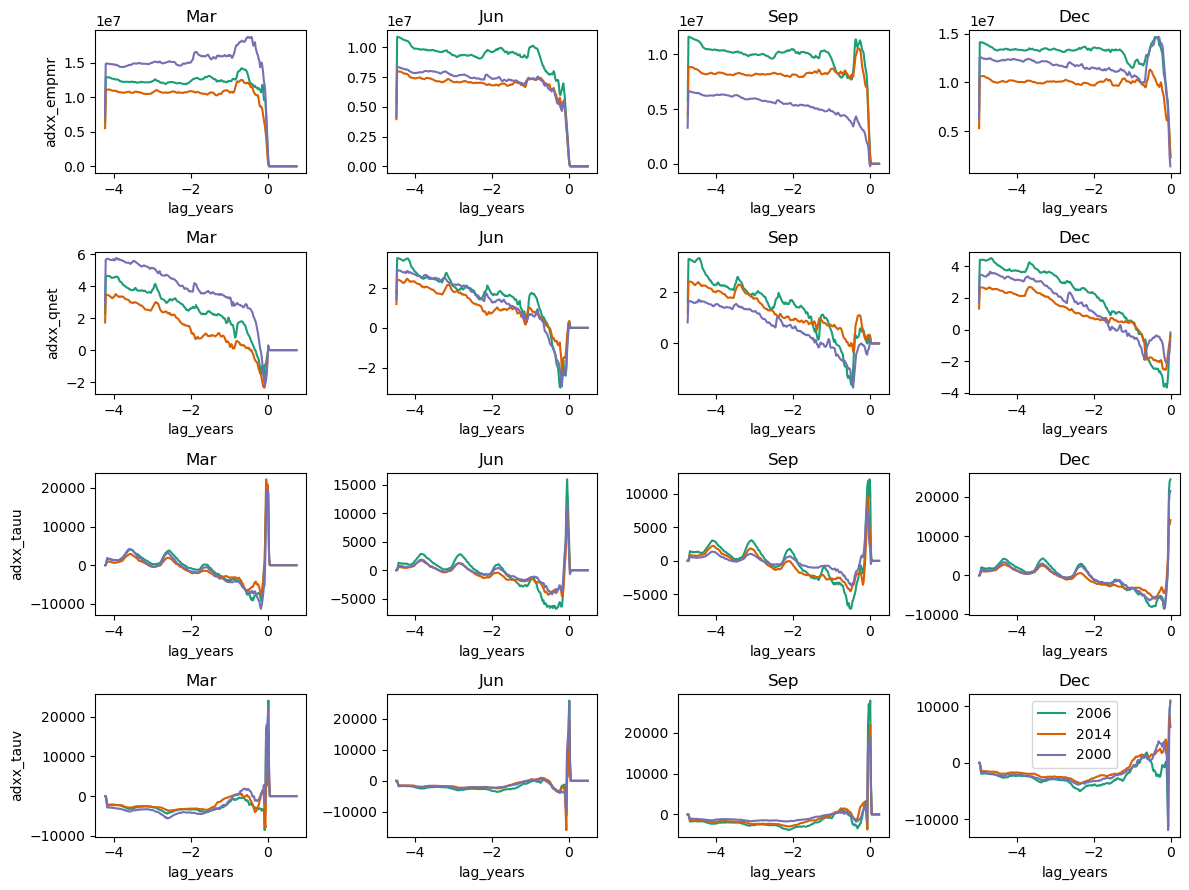

In [16]:
plt.figure(figsize=[12,9])
cmap=plt.get_cmap('Dark2')
stat='sum'
pp=1
for var in ds_all:
    for im,month in enumerate(mths):
        plt.subplot(4,4,pp)
        for ey,eyear in enumerate(eyears):
            ds_all[var].sel(month=month,eyear=eyear,stat=stat).dropna('lag_years').plot(x='lag_years',color=cmap(ey))
        plt.title(f'{month}')
        if im>0:
            plt.ylabel('')
        pp+=1
plt.tight_layout()
plt.legend(eyears)

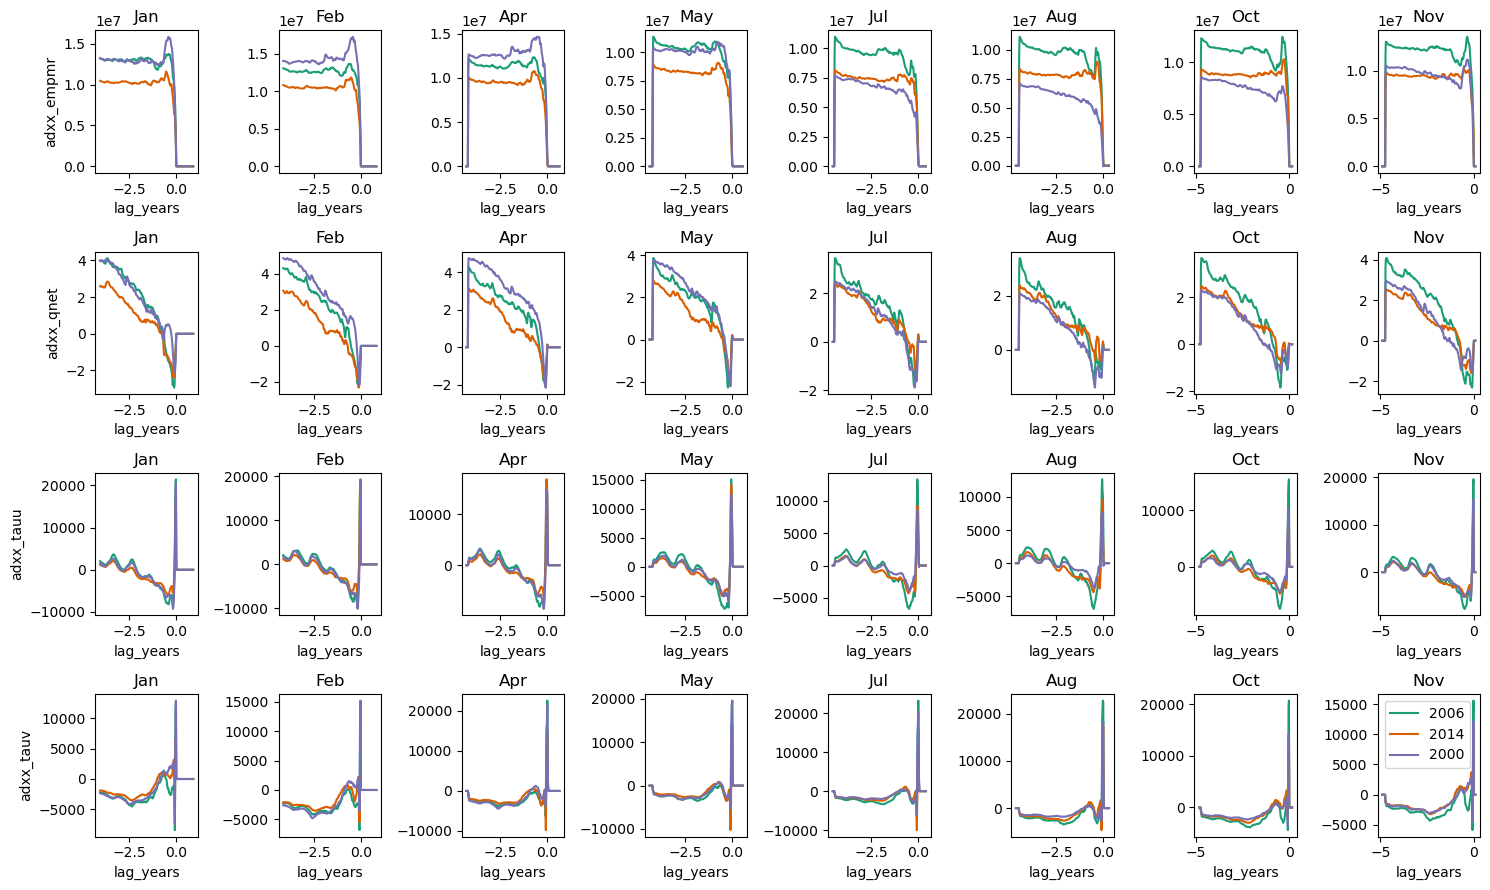

In [5]:
plt.figure(figsize=[15,9])
cmap=plt.get_cmap('Dark2')
stat='sum'
pp=1
for var in ds_all:
    for im,month in enumerate(mths_synth):
        plt.subplot(4,8,pp)
        for ey,eyear in enumerate(eyears):
            ds_all_synth[var].sel(month=month,eyear=eyear,stat=stat).dropna('lag_years').plot(x='lag_years',color=cmap(ey))
        plt.title(f'{month}')
        if im>0:
            plt.ylabel('')
        pp+=1
plt.tight_layout()
plt.legend(eyears)

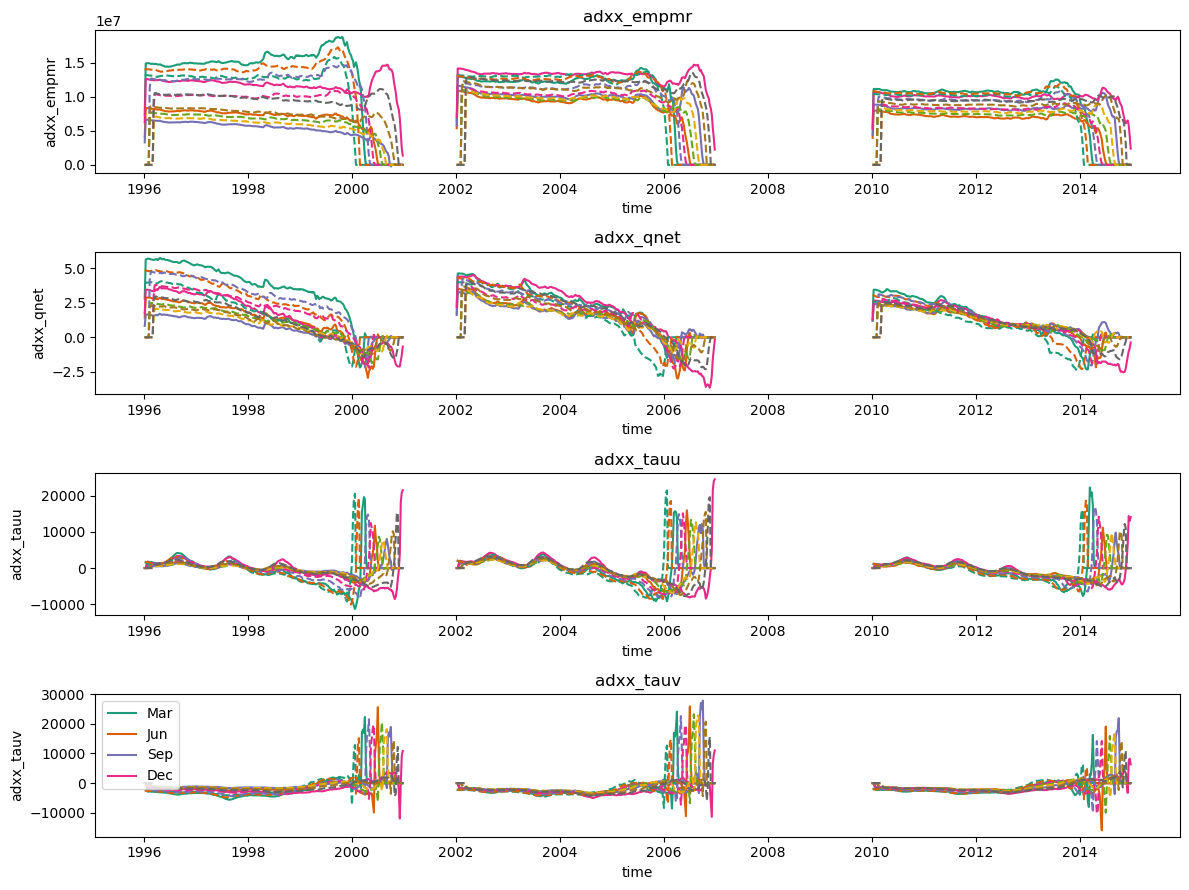

In [6]:
cmap=plt.get_cmap('Dark2')
plt.figure(figsize=[12,9])
stat='sum'
pp=1
for var in ds_all:
    plt.subplot(4,1,pp)
    for eyear in eyears:
        for im,month in enumerate(mths):
            ds_all[var].sel(month=month,eyear=eyear,stat=stat).dropna('lag_years').plot(x='time',color=cmap(im))
        for im,month in enumerate(mths_synth):
            ds_all_synth[var].sel(month=month,eyear=eyear,stat=stat).dropna('lag_years').plot(x='time',color=cmap(im),ls='--')
        plt.title(var)
    pp+=1
plt.tight_layout()
plt.legend(mths)

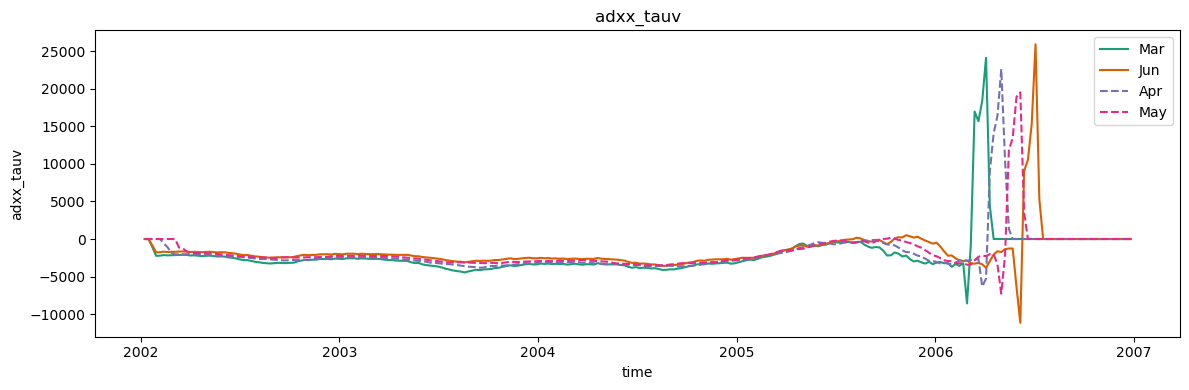

In [7]:

plt.figure(figsize=[12,4])
pp=1
var='adxx_tauv'
eyear = eyears[0]
for im,month in enumerate(['Mar','Jun']):
    ds_all[var].sel(month=month,eyear=eyear,stat=stat).dropna('lag_years').plot(x='time',color=cmap(im))
for im,month in enumerate(['Apr','May']):
    ds_all_synth[var].sel(month=month,eyear=eyear,stat=stat).dropna('lag_years').plot(x='time',color=cmap(im+2),ls='--')
plt.title(var)
pp+=1
plt.tight_layout()
plt.legend(['Mar','Jun','Apr','May'])

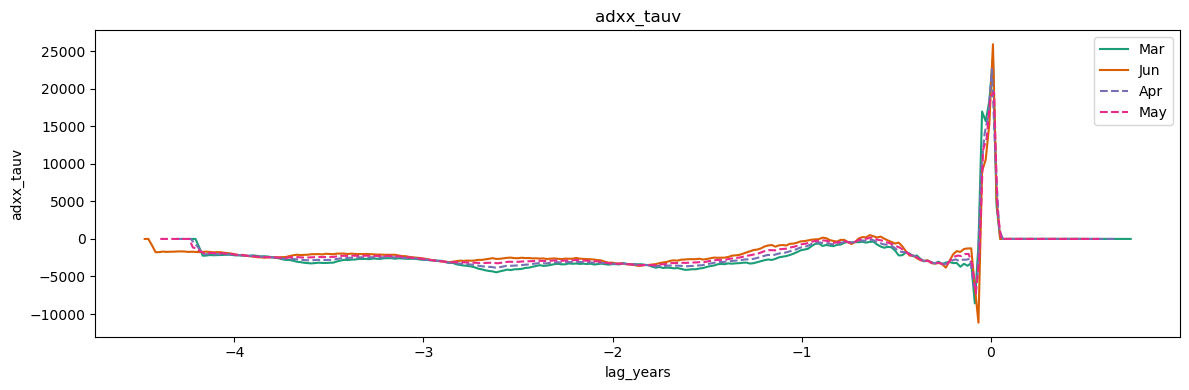

In [8]:
plt.figure(figsize=[12,4])
pp=1
var='adxx_tauv'
eyear = eyears[0]
for im,month in enumerate(['Mar','Jun']):
    ds_all[var].sel(month=month,eyear=eyear,stat=stat).dropna('lag_years').plot(x='lag_years',color=cmap(im))
for im,month in enumerate(['Apr','May']):
    ds_all_synth[var].sel(month=month,eyear=eyear,stat=stat).dropna('lag_years').plot(x='lag_years',color=cmap(im+2),ls='--')
plt.title(var)
pp+=1
plt.tight_layout()
plt.legend(['Mar','Jun','Apr','May'])

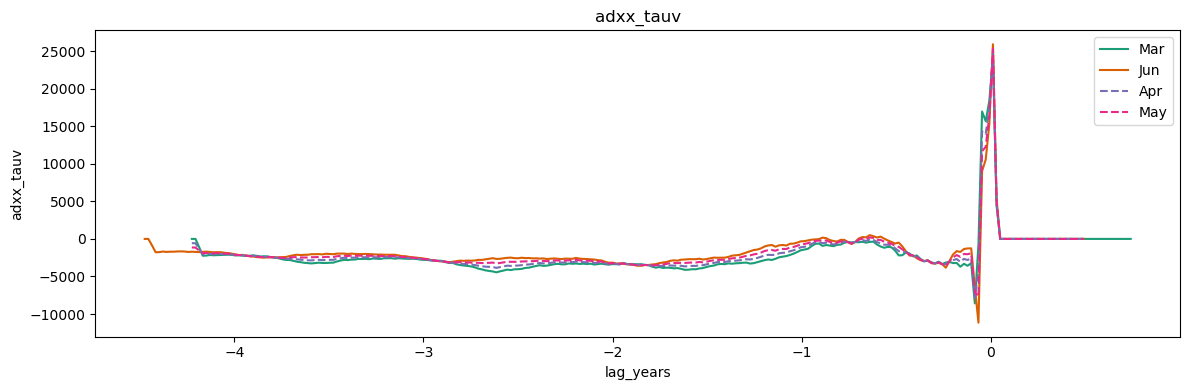

In [18]:
plt.figure(figsize=[12,4])
pp=1
var='adxx_tauv'
eyear = eyears[0]
for im,month in enumerate(['Mar','Jun']):
    ds_all[var].sel(month=month,eyear=eyear,stat=stat).dropna('lag_years').plot(x='lag_years',color=cmap(im))
(ds_all[var].sel(month='Mar')*2/3+ds_all[var].sel(month='Jun')*1/3).sel(eyear=eyear,stat=stat).dropna('lag_years').plot(x='lag_years',color=cmap(2),ls='--')
(ds_all[var].sel(month='Mar')*1/3+ds_all[var].sel(month='Jun')*2/3).sel(eyear=eyear,stat=stat).dropna('lag_years').plot(x='lag_years',color=cmap(3),ls='--')
#for im,month in enumerate(['Apr','May']):
#    ds_all_synth[var].sel(month=month,eyear=eyear,stat=stat).dropna('lag_years').plot(x='lag_years',color=cmap(im),ls='--')
plt.title(var)
pp+=1
plt.tight_layout()
plt.legend(['Mar','Jun','Apr','May'])